# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [190]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from config import api
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [105]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [48]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
#* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [49]:
url = "http://api.openweathermap.org/data/2.5/weather"
query = "Nashville"
url_params = {
    "api" : api,
    "q" : query,
    'page': 2
}
city_name = []
Lat = []
Long = []
MaxTemp = []
Humidity = []
Cloundiness = []
WindSpeed = []
Date = []
#enum
for city in cities:
   
    try: 
        # Build partial query URL
        query_url = f"{url}?appid={api}&q={city}"
        #query_url
    

    
        print("City : ",city)
        city_weather = requests.get(query_url).json()
    
    
    
        print(city_weather)
        city_name.append(city_weather['name'])
        Lat.append(city_weather['coord']['lat'])
        Long.append(city_weather['coord']['lon'])
        MaxTemp.append(city_weather['main']['temp_max'])
        Humidity.append(city_weather['main']['humidity'])
        Cloundiness.append(city_weather['clouds']['all'])
        WindSpeed.append(city_weather['wind']['speed'])
      
    except: 
        print("City not found")
    
    time.sleep(1)
print(city_name) 
    

City :  upernavik
{'coord': {'lon': -56.15, 'lat': 72.79}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 269.75, 'feels_like': 265.3, 'temp_min': 269.75, 'temp_max': 269.75, 'pressure': 1009, 'humidity': 95, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.77, 'deg': 128}, 'clouds': {'all': 88}, 'dt': 1603317927, 'sys': {'country': 'GL', 'sunrise': 1603280921, 'sunset': 1603307357}, 'timezone': -7200, 'id': 3418910, 'name': 'Upernavik', 'cod': 200}
City :  punta arenas
{'coord': {'lon': -70.92, 'lat': -53.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 282.09, 'feels_like': 277.95, 'temp_min': 282.04, 'temp_max': 282.15, 'pressure': 1007, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 310}, 'clouds': {'all': 90}, 'dt': 1603317964, 'sys': {'type': 1, 'id': 8487, 'cou

City :  maceio
{'coord': {'lon': -35.74, 'lat': -9.67}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 299.15, 'feels_like': 301.26, 'temp_min': 299.15, 'temp_max': 299.15, 'pressure': 1015, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 1603318088, 'sys': {'type': 1, 'id': 8413, 'country': 'BR', 'sunrise': 1603266984, 'sunset': 1603311498}, 'timezone': -10800, 'id': 3395981, 'name': 'Maceió', 'cod': 200}
City :  new norfolk
{'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 284.41, 'feels_like': 283.13, 'temp_min': 282.04, 'temp_max': 286.48, 'pressure': 1016, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 310}, 'clouds': {'all': 97}, 'dt': 1603317860, 'sys': {'type': 3, 'id': 2031307, 'country': 'AU', 'sunrise':

City :  port alfred
{'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.67, 'feels_like': 288.41, 'temp_min': 290.67, 'temp_max': 290.67, 'pressure': 1022, 'humidity': 85, 'sea_level': 1022, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 5.52, 'deg': 54}, 'clouds': {'all': 0}, 'dt': 1603317975, 'sys': {'country': 'ZA', 'sunrise': 1603336946, 'sunset': 1603384260}, 'timezone': 7200, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}
City :  padang
{'coord': {'lon': 100.35, 'lat': -0.95}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 297.22, 'feels_like': 300.05, 'temp_min': 297.22, 'temp_max': 297.22, 'pressure': 1010, 'humidity': 87, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 2538, 'wind': {'speed': 2.49, 'deg': 21}, 'rain': {'1h': 7.488}, 'clouds': {'all': 100}, '

City :  kitimat
{'coord': {'lon': -128.65, 'lat': 54.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 278.71, 'feels_like': 276.46, 'temp_min': 278.71, 'temp_max': 278.71, 'pressure': 1025, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 1}, 'clouds': {'all': 86}, 'dt': 1603318122, 'sys': {'type': 3, 'id': 2004800, 'country': 'CA', 'sunrise': 1603293305, 'sunset': 1603329770}, 'timezone': -25200, 'id': 5993072, 'name': 'Kitimat', 'cod': 200}
City :  charters towers
{'coord': {'lon': 146.27, 'lat': -20.1}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 296.77, 'feels_like': 295.83, 'temp_min': 296.77, 'temp_max': 296.77, 'pressure': 1013, 'humidity': 69, 'sea_level': 1013, 'grnd_level': 978}, 'visibility': 10000, 'wind': {'speed': 5.09, 'deg': 17}, 'clouds': {'all': 22}, 'dt': 1603318123, 'sys': {'country': 

City :  turukhansk
{'coord': {'lon': 87.98, 'lat': 65.82}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 267.92, 'feels_like': 263.62, 'temp_min': 267.92, 'temp_max': 267.92, 'pressure': 997, 'humidity': 98, 'sea_level': 997, 'grnd_level': 991}, 'visibility': 309, 'wind': {'speed': 2.34, 'deg': 227}, 'snow': {'1h': 0.17}, 'clouds': {'all': 97}, 'dt': 1603318142, 'sys': {'country': 'RU', 'sunrise': 1603330029, 'sunset': 1603361856}, 'timezone': 25200, 'id': 1488903, 'name': 'Turukhansk', 'cod': 200}
City :  bocaranga
{'cod': '404', 'message': 'city not found'}
City not found
City :  saint george
{'coord': {'lon': -113.58, 'lat': 37.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.58, 'feels_like': 296.73, 'temp_min': 299.15, 'temp_max': 301.48, 'pressure': 1012, 'humidity': 10}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 2

City :  trapani
{'coord': {'lon': 12.67, 'lat': 37.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.99, 'feels_like': 289.99, 'temp_min': 288.15, 'temp_max': 293.71, 'pressure': 1023, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 140}, 'clouds': {'all': 3}, 'dt': 1603318161, 'sys': {'type': 1, 'id': 6714, 'country': 'IT', 'sunrise': 1603344278, 'sunset': 1603383753}, 'timezone': 7200, 'id': 2522875, 'name': 'Province of Trapani', 'cod': 200}
City :  bilibino
{'coord': {'lon': 166.44, 'lat': 68.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 267.01, 'feels_like': 263.67, 'temp_min': 267.01, 'temp_max': 267.01, 'pressure': 1024, 'humidity': 96, 'sea_level': 1024, 'grnd_level': 989}, 'visibility': 9023, 'wind': {'speed': 0.81, 'deg': 93}, 'clouds': {'all': 86}, 'dt': 1603318162, 'sys': {'country': 'R

City :  pithoragarh
{'coord': {'lon': 80.22, 'lat': 29.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 283.18, 'feels_like': 281.54, 'temp_min': 283.18, 'temp_max': 283.18, 'pressure': 1013, 'humidity': 81, 'sea_level': 1013, 'grnd_level': 846}, 'visibility': 10000, 'wind': {'speed': 1.32, 'deg': 356}, 'clouds': {'all': 0}, 'dt': 1603318179, 'sys': {'country': 'IN', 'sunrise': 1603327509, 'sunset': 1603368101}, 'timezone': 19800, 'id': 1259503, 'name': 'Pithorāgarh', 'cod': 200}
City :  mount gambier
{'coord': {'lon': 140.77, 'lat': -37.83}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 281.15, 'feels_like': 279.22, 'temp_min': 281.15, 'temp_max': 281.15, 'pressure': 1016, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 130}, 'clouds': {'all': 61}, 'dt': 1603317907, 'sys': {'type': 1, 'id': 9560, 'country'

City :  attawapiskat
{'cod': '404', 'message': 'city not found'}
City not found
City :  touros
{'coord': {'lon': -35.46, 'lat': -5.2}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 297.15, 'feels_like': 301.5, 'temp_min': 297.15, 'temp_max': 297.15, 'pressure': 1014, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 170}, 'clouds': {'all': 75}, 'dt': 1603318144, 'sys': {'type': 1, 'id': 8452, 'country': 'BR', 'sunrise': 1603267129, 'sunset': 1603311219}, 'timezone': -10800, 'id': 3386213, 'name': 'Touros', 'cod': 200}
City :  tahta
{'coord': {'lon': 31.5, 'lat': 26.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 300.15, 'feels_like': 299.09, 'temp_min': 300.15, 'temp_max': 300.15, 'pressure': 1014, 'humidity': 34}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 90}, 'clouds': {'all': 0}, 'dt': 1603318201, 's

City :  sambava
{'coord': {'lon': 50.17, 'lat': -14.27}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 296.76, 'feels_like': 296.39, 'temp_min': 296.76, 'temp_max': 296.76, 'pressure': 1016, 'humidity': 80, 'sea_level': 1016, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 5.78, 'deg': 179}, 'rain': {'1h': 0.12}, 'clouds': {'all': 96}, 'dt': 1603318218, 'sys': {'country': 'MG', 'sunrise': 1603332516, 'sunset': 1603377516}, 'timezone': 10800, 'id': 1056899, 'name': 'Sambava', 'cod': 200}
City :  saskylakh
{'coord': {'lon': 114.08, 'lat': 71.92}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 260.26, 'feels_like': 255.14, 'temp_min': 260.26, 'temp_max': 260.26, 'pressure': 1008, 'humidity': 94, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 184}, 'clouds': {'all': 91}, 'dt': 

City :  tuatapere
{'coord': {'lon': 167.68, 'lat': -46.13}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 287.59, 'feels_like': 285.27, 'temp_min': 287.59, 'temp_max': 287.59, 'pressure': 1020, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 334, 'gust': 4.47}, 'clouds': {'all': 92}, 'dt': 1603317936, 'sys': {'type': 3, 'id': 2008959, 'country': 'NZ', 'sunrise': 1603302105, 'sunset': 1603351528}, 'timezone': 46800, 'id': 2180815, 'name': 'Tuatapere', 'cod': 200}
City :  fort nelson
{'coord': {'lon': -122.7, 'lat': 58.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 269.15, 'feels_like': 263.85, 'temp_min': 269.15, 'temp_max': 269.15, 'pressure': 1034, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1603318156, 'sys': {'type': 1, 'id': 986, 'count

City :  beloha
{'coord': {'lon': 45.05, 'lat': -25.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 294.58, 'feels_like': 293.35, 'temp_min': 294.58, 'temp_max': 294.58, 'pressure': 1016, 'humidity': 72, 'sea_level': 1016, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 4.68, 'deg': 100}, 'clouds': {'all': 0}, 'dt': 1603318253, 'sys': {'country': 'MG', 'sunrise': 1603333142, 'sunset': 1603379348}, 'timezone': 10800, 'id': 1067565, 'name': 'Beloha', 'cod': 200}
City :  deputatskiy
{'coord': {'lon': 139.9, 'lat': 69.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 258.05, 'feels_like': 254.15, 'temp_min': 258.05, 'temp_max': 258.05, 'pressure': 1013, 'humidity': 96, 'sea_level': 1013, 'grnd_level': 939}, 'visibility': 2853, 'wind': {'speed': 0.71, 'deg': 117}, 'clouds': {'all': 100}, 'dt': 1603317997, 'sys': {'count

City :  cumaribo
{'cod': '404', 'message': 'city not found'}
City not found
City :  seoul
{'coord': {'lon': 126.98, 'lat': 37.57}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 286.15, 'feels_like': 285.55, 'temp_min': 286.15, 'temp_max': 286.15, 'pressure': 1014, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 1.69, 'deg': 165}, 'clouds': {'all': 90}, 'dt': 1603317570, 'sys': {'type': 1, 'id': 8117, 'country': 'KR', 'sunrise': 1603316805, 'sunset': 1603356362}, 'timezone': 32400, 'id': 1835848, 'name': 'Seoul', 'cod': 200}
City :  paamiut
{'coord': {'lon': -49.67, 'lat': 61.99}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 274.49, 'feels_like': 263.6, 'temp_min': 274.49, 'temp_max': 274.49, 'pressure': 1007, 'humidity': 84, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 12.5, 'de

City :  vryburg
{'coord': {'lon': 24.73, 'lat': -26.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 296.64, 'feels_like': 290.35, 'temp_min': 296.64, 'temp_max': 296.64, 'pressure': 1017, 'humidity': 29, 'sea_level': 1017, 'grnd_level': 888}, 'visibility': 10000, 'wind': {'speed': 7.22, 'deg': 22}, 'clouds': {'all': 0}, 'dt': 1603318292, 'sys': {'country': 'ZA', 'sunrise': 1603337907, 'sunset': 1603384336}, 'timezone': 7200, 'id': 942511, 'name': 'Vryburg', 'cod': 200}
City :  nalut
{'coord': {'lon': 10.85, 'lat': 30.33}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 293.58, 'feels_like': 287.48, 'temp_min': 293.58, 'temp_max': 293.58, 'pressure': 1021, 'humidity': 43, 'sea_level': 1021, 'grnd_level': 961}, 'visibility': 10000, 'wind': {'speed': 7.85, 'deg': 111}, 'clouds': {'all': 0}, 'dt': 1603318293, 'sys': {'country': 'LY', 'su

City :  san juan del sur
{'coord': {'lon': -85.87, 'lat': 11.25}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 299.47, 'feels_like': 300.08, 'temp_min': 299.47, 'temp_max': 299.47, 'pressure': 1008, 'humidity': 85, 'sea_level': 1008, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 7.1, 'deg': 174}, 'rain': {'1h': 0.35}, 'clouds': {'all': 100}, 'dt': 1603318310, 'sys': {'country': 'NI', 'sunrise': 1603279993, 'sunset': 1603322549}, 'timezone': -21600, 'id': 3616726, 'name': 'San Juan del Sur', 'cod': 200}
City :  great yarmouth
{'coord': {'lon': 1.73, 'lat': 52.61}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 286.5, 'feels_like': 284.99, 'temp_min': 285.93, 'temp_max': 287.04, 'pressure': 1001, 'humidity': 99}, 'visibility': 10000, 'wind': {'speed': 3.58, 'deg': 223, 'gust': 9.39}, 'rain': {'1h': 2.02}, 'clouds': {'all

City :  bredasdorp
{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 286.15, 'feels_like': 285.74, 'temp_min': 286.15, 'temp_max': 286.15, 'pressure': 1021, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 210}, 'clouds': {'all': 0}, 'dt': 1603318328, 'sys': {'type': 1, 'id': 1966, 'country': 'ZA', 'sunrise': 1603338520, 'sunset': 1603385973}, 'timezone': 7200, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}
City :  souillac
{'coord': {'lon': 57.52, 'lat': -20.52}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 297.15, 'feels_like': 296.75, 'temp_min': 297.15, 'temp_max': 297.15, 'pressure': 1019, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 130}, 'clouds': {'all': 40}, 'dt': 1603318329, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 16033

City :  southbridge
{'coord': {'lon': -72.03, 'lat': 42.08}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.17, 'feels_like': 294.79, 'temp_min': 292.04, 'temp_max': 293.71, 'pressure': 1023, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 190, 'gust': 0.89}, 'clouds': {'all': 61}, 'dt': 1603318350, 'sys': {'type': 3, 'id': 2033035, 'country': 'US', 'sunrise': 1603278482, 'sunset': 1603317418}, 'timezone': -14400, 'id': 4951594, 'name': 'Southbridge', 'cod': 200}
City :  saint-georges
{'coord': {'lon': -61.75, 'lat': 12.06}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 304.15, 'feels_like': 305.1, 'temp_min': 304.15, 'temp_max': 304.15, 'pressure': 1012, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1603318351, 'sys': {'type': 1, 'id': 8781, 'count

City :  svetlogorsk
{'coord': {'lon': 29.73, 'lat': 52.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 280.09, 'feels_like': 277.45, 'temp_min': 280.09, 'temp_max': 280.09, 'pressure': 1017, 'humidity': 89, 'sea_level': 1017, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 214}, 'clouds': {'all': 100}, 'dt': 1603318368, 'sys': {'country': 'BY', 'sunrise': 1603341576, 'sunset': 1603378267}, 'timezone': 10800, 'id': 10722858, 'name': 'Forsytheganj', 'cod': 200}
City :  flin flon
{'coord': {'lon': -101.86, 'lat': 54.77}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 271.15, 'feels_like': 266.62, 'temp_min': 271.15, 'temp_max': 271.15, 'pressure': 1019, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 300}, 'clouds': {'all': 75}, 'dt': 1603318214, 'sys': {'type': 1, 'id': 782, 'co

City :  alta floresta
{'coord': {'lon': -56.09, 'lat': -9.88}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 298.72, 'feels_like': 300.8, 'temp_min': 298.72, 'temp_max': 298.72, 'pressure': 1009, 'humidity': 76, 'sea_level': 1009, 'grnd_level': 977}, 'visibility': 10000, 'wind': {'speed': 3.02, 'deg': 69}, 'rain': {'1h': 0.45}, 'clouds': {'all': 79}, 'dt': 1603318385, 'sys': {'country': 'BR', 'sunrise': 1603271857, 'sunset': 1603316393}, 'timezone': -14400, 'id': 6316343, 'name': 'Alta Floresta', 'cod': 200}
City :  khonuu
{'cod': '404', 'message': 'city not found'}
City not found
City :  phanom thuan
{'coord': {'lon': 99.7, 'lat': 14.13}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.67, 'feels_like': 299.7, 'temp_min': 296.67, 'temp_max': 296.67, 'pressure': 1009, 'humidity': 86, 'sea_level': 1009, 'grnd_level': 1007}, 'v

City :  alice springs
{'coord': {'lon': 133.88, 'lat': -23.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 299.15, 'feels_like': 298.41, 'temp_min': 299.15, 'temp_max': 299.15, 'pressure': 1009, 'humidity': 39}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 100}, 'clouds': {'all': 2}, 'dt': 1603318150, 'sys': {'type': 1, 'id': 9483, 'country': 'AU', 'sunrise': 1603311922, 'sunset': 1603357934}, 'timezone': 34200, 'id': 2077895, 'name': 'Alice Springs', 'cod': 200}
City :  teguise
{'coord': {'lon': -13.56, 'lat': 29.06}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 294.15, 'feels_like': 295.89, 'temp_min': 294.15, 'temp_max': 294.15, 'pressure': 1015, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 60}, 'clouds': {'all': 40}, 'dt': 1603318404, 'sys': {'type': 1, 'id': 2379, 'country': 'ES', 'sunrise': 160326

City :  cortes
{'coord': {'lon': -1.44, 'lat': 41.94}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 291.16, 'feels_like': 285.86, 'temp_min': 290.15, 'temp_max': 292.15, 'pressure': 1013, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 180}, 'clouds': {'all': 100}, 'dt': 1603318422, 'sys': {'type': 1, 'id': 6407, 'country': 'ES', 'sunrise': 1603347986, 'sunset': 1603386816}, 'timezone': 7200, 'id': 6359626, 'name': 'Cortes', 'cod': 200}
City :  champerico
{'coord': {'lon': -91.92, 'lat': 14.3}, 'weather': [{'id': 200, 'main': 'Thunderstorm', 'description': 'thunderstorm with light rain', 'icon': '11d'}], 'base': 'stations', 'main': {'temp': 299.09, 'feels_like': 301.07, 'temp_min': 293.71, 'temp_max': 304.15, 'pressure': 1010, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1603318423, 'sys': {'type': 1, 'id': 7068, 'country': '

City :  mizque
{'coord': {'lon': -65.34, 'lat': -17.94}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 294.76, 'feels_like': 292.41, 'temp_min': 294.76, 'temp_max': 294.76, 'pressure': 1012, 'humidity': 50, 'sea_level': 1012, 'grnd_level': 806}, 'visibility': 10000, 'wind': {'speed': 3.71, 'deg': 91}, 'rain': {'1h': 0.34}, 'clouds': {'all': 72}, 'dt': 1603318391, 'sys': {'country': 'BO', 'sunrise': 1603273671, 'sunset': 1603319018}, 'timezone': -14400, 'id': 3910291, 'name': 'Mizque', 'cod': 200}
City :  bay roberts
{'coord': {'lon': -53.26, 'lat': 47.6}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 282.81, 'feels_like': 277.81, 'temp_min': 281.48, 'temp_max': 284.82, 'pressure': 1029, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 6.57, 'deg': 45}, 'clouds': {'all': 23}, 'dt': 1603318442, 'sys': {'type': 3, 'id': 2021239,

City :  kirakira
{'coord': {'lon': 161.92, 'lat': -10.45}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 302.1, 'feels_like': 304.85, 'temp_min': 302.1, 'temp_max': 302.1, 'pressure': 1011, 'humidity': 69, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.3, 'deg': 73}, 'clouds': {'all': 18}, 'dt': 1603318166, 'sys': {'country': 'SB', 'sunrise': 1603305897, 'sunset': 1603350501}, 'timezone': 39600, 'id': 2178753, 'name': 'Kirakira', 'cod': 200}
City :  janakpur road
{'cod': '404', 'message': 'city not found'}
City not found
City :  esperance
{'coord': {'lon': 121.9, 'lat': -33.87}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 287.15, 'feels_like': 285.54, 'temp_min': 287.15, 'temp_max': 287.15, 'pressure': 1014, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 160}, 'clouds': 

City :  port lincoln
{'coord': {'lon': 135.87, 'lat': -34.73}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 287.84, 'feels_like': 281.28, 'temp_min': 287.84, 'temp_max': 287.84, 'pressure': 1010, 'humidity': 81, 'sea_level': 1010, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 10.03, 'deg': 97}, 'rain': {'1h': 0.749}, 'clouds': {'all': 92}, 'dt': 1603318479, 'sys': {'country': 'AU', 'sunrise': 1603310729, 'sunset': 1603358172}, 'timezone': 37800, 'id': 2063036, 'name': 'Port Lincoln', 'cod': 200}
City :  annan
{'coord': {'lon': -3.26, 'lat': 54.99}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 282.08, 'feels_like': 276.81, 'temp_min': 282.04, 'temp_max': 282.15, 'pressure': 994, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 240}, 'clouds': {'all': 89}, 'dt': 1603318481, 'sys': {'type': 1, '

City :  vila velha
{'coord': {'lon': -40.29, 'lat': -20.33}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.85, 'feels_like': 300.53, 'temp_min': 297.59, 'temp_max': 298.15, 'pressure': 1016, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1603318498, 'sys': {'type': 1, 'id': 8474, 'country': 'BR', 'sunrise': 1603267535, 'sunset': 1603313132}, 'timezone': -10800, 'id': 3445026, 'name': 'Vila Velha', 'cod': 200}
City :  buraydah
{'coord': {'lon': 43.98, 'lat': 26.33}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 293.15, 'feels_like': 290.41, 'temp_min': 293.15, 'temp_max': 293.15, 'pressure': 1019, 'humidity': 30}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1603318499, 'sys': {'type': 1, 'id': 7411, 'country': 'SA', 'sunrise': 16033

City :  sentyabrskiy
{'cod': '404', 'message': 'city not found'}
City not found
City :  kondinskoye
{'coord': {'lon': 67.41, 'lat': 59.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 271.22, 'feels_like': 267.1, 'temp_min': 271.22, 'temp_max': 271.22, 'pressure': 1000, 'humidity': 99, 'sea_level': 1000, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 2.64, 'deg': 298}, 'clouds': {'all': 76}, 'dt': 1603318519, 'sys': {'country': 'RU', 'sunrise': 1603333573, 'sunset': 1603368185}, 'timezone': 18000, 'id': 1502697, 'name': 'Kondinskoye', 'cod': 200}
City :  makakilo city
{'coord': {'lon': -158.09, 'lat': 21.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 301.4, 'feels_like': 303.36, 'temp_min': 300.93, 'temp_max': 302.15, 'pressure': 1015, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 150}, 'cl

City :  pundaguitan
{'coord': {'lon': 126.17, 'lat': 6.37}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.62, 'feels_like': 304.42, 'temp_min': 301.62, 'temp_max': 301.62, 'pressure': 1009, 'humidity': 80, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 4.89, 'deg': 202}, 'clouds': {'all': 100}, 'dt': 1603318535, 'sys': {'country': 'PH', 'sunrise': 1603315275, 'sunset': 1603358282}, 'timezone': 28800, 'id': 1698289, 'name': 'Pundaguitan', 'cod': 200}
City :  burnie
{'coord': {'lon': 145.92, 'lat': -41.07}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 285.71, 'feels_like': 282.81, 'temp_min': 285.71, 'temp_max': 285.71, 'pressure': 1016, 'humidity': 73, 'sea_level': 1016, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 3.43, 'deg': 113}, 'clouds': {'all': 71}, 'dt': 1603318536

City :  olafsvik
{'coord': {'lon': -23.71, 'lat': 64.89}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 277.68, 'feels_like': 267.07, 'temp_min': 277.68, 'temp_max': 277.68, 'pressure': 999, 'humidity': 90, 'sea_level': 999, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 13.02, 'deg': 121}, 'rain': {'1h': 0.41}, 'clouds': {'all': 100}, 'dt': 1603318553, 'sys': {'country': 'IS', 'sunrise': 1603270045, 'sunset': 1603302663}, 'timezone': 0, 'id': 3414079, 'name': 'Olafsvik', 'cod': 200}
City :  cobija
{'coord': {'lon': -68.77, 'lat': -11.03}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 301.2, 'feels_like': 304.54, 'temp_min': 301.2, 'temp_max': 301.2, 'pressure': 1008, 'humidity': 65, 'sea_level': 1008, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 1.1, 'deg': 270}, 'rain': {'1h': 1.3428}, 'clouds': {'all': 

City :  busdi
{'coord': {'lon': 125.25, 'lat': 8.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 293.96, 'feels_like': 296.25, 'temp_min': 293.96, 'temp_max': 293.96, 'pressure': 1009, 'humidity': 86, 'sea_level': 1009, 'grnd_level': 938}, 'visibility': 10000, 'wind': {'speed': 0.95, 'deg': 286}, 'clouds': {'all': 100}, 'dt': 1603318571, 'sys': {'country': 'PH', 'sunrise': 1603315586, 'sunset': 1603358412}, 'timezone': 28800, 'id': 1722307, 'name': 'Busdi', 'cod': 200}
City :  peniche
{'coord': {'lon': -9.38, 'lat': 39.36}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 287.98, 'feels_like': 286.05, 'temp_min': 287.04, 'temp_max': 288.71, 'pressure': 1009, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 4.02, 'deg': 208, 'gust': 5.81}, 'clouds': {'all': 61}, 'dt': 1603318356, 'sys': {'type': 3, 'id': 2002825, 'co

City :  namatanai
{'coord': {'lon': 152.43, 'lat': -3.67}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.53, 'feels_like': 304.15, 'temp_min': 301.53, 'temp_max': 301.53, 'pressure': 1010, 'humidity': 72, 'sea_level': 1010, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 3.62, 'deg': 48}, 'clouds': {'all': 66}, 'dt': 1603318588, 'sys': {'country': 'PG', 'sunrise': 1603308500, 'sunset': 1603352452}, 'timezone': 36000, 'id': 2090021, 'name': 'Namatanai', 'cod': 200}
City :  viedma
{'coord': {'lon': -63, 'lat': -40.81}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 286.48, 'feels_like': 284.63, 'temp_min': 286.48, 'temp_max': 286.48, 'pressure': 1026, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 0, 'gust': 5.36}, 'clouds': {'all': 94}, 'dt': 1603318589, 'sys': {'type': 3, 'id': 2030260,

City :  aranos
{'coord': {'lon': 19.12, 'lat': -24.13}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 299.14, 'feels_like': 293.36, 'temp_min': 299.14, 'temp_max': 299.14, 'pressure': 1012, 'humidity': 17, 'sea_level': 1012, 'grnd_level': 884}, 'visibility': 10000, 'wind': {'speed': 5.22, 'deg': 73}, 'clouds': {'all': 45}, 'dt': 1603318606, 'sys': {'country': 'NA', 'sunrise': 1603339424, 'sunset': 1603385511}, 'timezone': 7200, 'id': 3358666, 'name': 'Aranos', 'cod': 200}
City :  bodden town
{'coord': {'lon': -81.25, 'lat': 19.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 302.23, 'feels_like': 305.5, 'temp_min': 301.48, 'temp_max': 303.15, 'pressure': 1008, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1603318607, 'sys': {'type': 1, 'id': 7265, 'country': 'KY', 's

City :  kapoeta
{'coord': {'lon': 33.59, 'lat': 4.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.66, 'feels_like': 301.63, 'temp_min': 299.66, 'temp_max': 299.66, 'pressure': 1010, 'humidity': 59, 'sea_level': 1010, 'grnd_level': 937}, 'visibility': 10000, 'wind': {'speed': 1.08, 'deg': 215}, 'clouds': {'all': 87}, 'dt': 1603318624, 'sys': {'country': 'SS', 'sunrise': 1603337418, 'sunset': 1603380572}, 'timezone': 10800, 'id': 372884, 'name': 'Kapoeta', 'cod': 200}
City :  belushya guba
{'cod': '404', 'message': 'city not found'}
City not found
City :  karang tengah
{'coord': {'lon': 111.86, 'lat': -7.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 297.86, 'feels_like': 301.77, 'temp_min': 297.86, 'temp_max': 297.86, 'pressure': 1009, 'humidity': 84, 'sea_level': 1009, 'grnd_level': 1001}, 'visibility': 10000,

City :  kenai
{'coord': {'lon': -151.26, 'lat': 60.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 277.66, 'feels_like': 273.27, 'temp_min': 276.15, 'temp_max': 279.26, 'pressure': 1035, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 50}, 'clouds': {'all': 1}, 'dt': 1603318448, 'sys': {'type': 1, 'id': 7680, 'country': 'US', 'sunrise': 1603299761, 'sunset': 1603334165}, 'timezone': -28800, 'id': 5866063, 'name': 'Kenai', 'cod': 200}
City :  marion
{'coord': {'lon': -86.16, 'lat': 39.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 288.98, 'feels_like': 288.49, 'temp_min': 288.15, 'temp_max': 289.82, 'pressure': 1022, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 130}, 'clouds': {'all': 90}, 'dt': 1603318435, 'sys': {'type': 1, 'id': 4533, 'country': 'US', 'sunrise': 1603281696, 's

City :  rio grande
{'coord': {'lon': -52.1, 'lat': -32.03}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 289.26, 'feels_like': 289.49, 'temp_min': 289.26, 'temp_max': 289.26, 'pressure': 1023, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 73, 'gust': 4.92}, 'clouds': {'all': 100}, 'dt': 1603318406, 'sys': {'type': 3, 'id': 2020865, 'country': 'BR', 'sunrise': 1603269664, 'sunset': 1603316670}, 'timezone': -10800, 'id': 3451138, 'name': 'Rio Grande', 'cod': 200}
City :  lilongwe
{'coord': {'lon': 33.79, 'lat': -13.97}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 296.54, 'feels_like': 294.67, 'temp_min': 296.54, 'temp_max': 296.54, 'pressure': 1014, 'humidity': 40, 'sea_level': 1014, 'grnd_level': 902}, 'visibility': 10000, 'wind': {'speed': 2.36, 'deg': 127}, 'clouds': {'all': 25}, 'dt': 1603318

City :  dudinka
{'coord': {'lon': 86.18, 'lat': 69.41}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 262.15, 'feels_like': 253.99, 'temp_min': 262.15, 'temp_max': 262.15, 'pressure': 995, 'humidity': 85}, 'visibility': 2500, 'wind': {'speed': 7, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1603318686, 'sys': {'type': 1, 'id': 8951, 'country': 'RU', 'sunrise': 1603331682, 'sunset': 1603361067}, 'timezone': 25200, 'id': 1507116, 'name': 'Dudinka', 'cod': 200}
City :  yunjinghong
{'cod': '404', 'message': 'city not found'}
City not found
City :  kirs
{'coord': {'lon': 52.24, 'lat': 59.34}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 270.85, 'feels_like': 265.94, 'temp_min': 270.85, 'temp_max': 270.85, 'pressure': 1009, 'humidity': 93, 'sea_level': 1009, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 3.56, 'deg': 296}, 'clouds

City :  kuusamo
{'coord': {'lon': 29.18, 'lat': 65.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 270.15, 'feels_like': 263.97, 'temp_min': 270.15, 'temp_max': 270.15, 'pressure': 1010, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 120}, 'clouds': {'all': 90}, 'dt': 1603318706, 'sys': {'type': 1, 'id': 1352, 'country': 'FI', 'sunrise': 1603344218, 'sunset': 1603375888}, 'timezone': 10800, 'id': 649924, 'name': 'Kuusamo', 'cod': 200}
City :  eyrarbakki
{'coord': {'lon': -21.15, 'lat': 63.86}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 276.3, 'feels_like': 269.28, 'temp_min': 275.37, 'temp_max': 277.15, 'pressure': 1002, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 110}, 'clouds': {'all': 75}, 'dt': 1603318707, 'sys': {'type': 1, 'id': 91, 'country': 'IS', 'sunrise': 160326

City :  rapid valley
{'coord': {'lon': -103.15, 'lat': 44.06}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 272.8, 'feels_like': 267.39, 'temp_min': 272.15, 'temp_max': 273.15, 'pressure': 1014, 'humidity': 92}, 'visibility': 4828, 'wind': {'speed': 4.6, 'deg': 60}, 'clouds': {'all': 90}, 'dt': 1603318725, 'sys': {'type': 1, 'id': 5623, 'country': 'US', 'sunrise': 1603286123, 'sunset': 1603324713}, 'timezone': -21600, 'id': 5768244, 'name': 'Rapid Valley', 'cod': 200}
City :  santa maria
{'coord': {'lon': -53.81, 'lat': -29.68}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 294.3, 'feels_like': 292.37, 'temp_min': 294.3, 'temp_max': 294.3, 'pressure': 1018, 'humidity': 76, 'sea_level': 1018, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 6.01, 'deg': 114}, 'clouds': {'all': 12}, 'dt': 1603318727, 'sys': {'country': 'BR', 'su

City :  denpasar
{'coord': {'lon': 115.22, 'lat': -8.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 298.15, 'feels_like': 304.22, 'temp_min': 298.15, 'temp_max': 298.15, 'pressure': 1009, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 0.5, 'deg': 0}, 'clouds': {'all': 40}, 'dt': 1603318344, 'sys': {'type': 1, 'id': 9333, 'country': 'ID', 'sunrise': 1603317190, 'sunset': 1603361622}, 'timezone': 28800, 'id': 1645528, 'name': 'Denpasar', 'cod': 200}
City :  mtwara
{'coord': {'lon': 40.18, 'lat': -10.27}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 297.15, 'feels_like': 299.97, 'temp_min': 297.15, 'temp_max': 297.15, 'pressure': 1014, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 180}, 'clouds': {'all': 20}, 'dt': 1603318743, 'sys': {'type': 1, 'id': 2617, 'country': 'TZ', 'sunrise': 160333

In [106]:
requests.get(query_url).json()['wind']

{'speed': 3.1, 'deg': 90}

In [107]:
# Get data from csv file
data = requests.get(query_url).json()
data




{'coord': {'lon': 40.18, 'lat': -10.27},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 299.15,
  'feels_like': 302.16,
  'temp_min': 299.15,
  'temp_max': 299.15,
  'pressure': 1013,
  'humidity': 83},
 'visibility': 10000,
 'wind': {'speed': 3.1, 'deg': 90},
 'clouds': {'all': 20},
 'dt': 1603384898,
 'sys': {'type': 1,
  'id': 2617,
  'country': 'TZ',
  'sunrise': 1603335115,
  'sunset': 1603379712},
 'timezone': 10800,
 'id': 877747,
 'name': 'Mtwara',
 'cod': 200}

In [195]:
Temp

NameError: name 'Temp' is not defined

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [146]:

city_weather_df = pd.DataFrame({
    'city' : city_name,
    'Lat' : Lat,
    'Long' :Long,
    'MaxTemp' : MaxTemp,
    'Humidity' : Humidity,
    'Cloundiness' : Cloundiness,
    'Wind Speed' : WindSpeed 
})


city_weather_df
   


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed
0,Upernavik,72.79,-56.15,269.75,95,88,2.77
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10
2,Avarua,-21.21,-159.78,298.15,83,54,5.10
3,Hermanus,-34.42,19.23,282.59,94,0,3.54
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43
...,...,...,...,...,...,...,...
537,Panjāb,34.39,67.02,270.90,77,0,2.32
538,Berezovyy,51.67,135.70,277.57,88,100,0.83
539,Aktobe,50.28,57.21,276.15,59,90,6.00
540,Denpasar,-8.65,115.22,298.15,100,40,0.50


In [136]:
#export to csv
city_weather_df = city_weather_df.to_csv("cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [181]:
#  Get the indices of cities that have humidity over 100%.
#city_weather_df.drop(['Humidity'], >= 100)

# CREATE INDEX
index_names = city_weather_df[city_weather_df['Humidity'] > 100 ].index 
# drop these row indexes 
# from dataFrame 
city_clean_data = city_weather_df.drop(index_names, inplace = False) 
  
city_clean_data
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed
0,Upernavik,72.79,-56.15,269.75,95,88,2.77
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10
2,Avarua,-21.21,-159.78,298.15,83,54,5.10
3,Hermanus,-34.42,19.23,282.59,94,0,3.54
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43
...,...,...,...,...,...,...,...
537,Panjāb,34.39,67.02,270.90,77,0,2.32
538,Berezovyy,51.67,135.70,277.57,88,100,0.83
539,Aktobe,50.28,57.21,276.15,59,90,6.00
540,Denpasar,-8.65,115.22,298.15,100,40,0.50


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

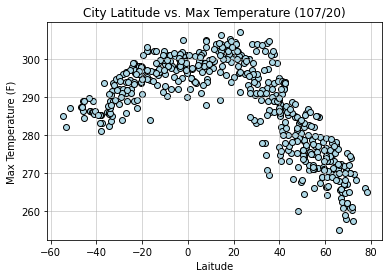

In [182]:

# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["MaxTemp"], facecolor = "lightblue", edgecolor = "black")

# Set title/
plt.title("City Latitude vs. Max Temperature (107/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

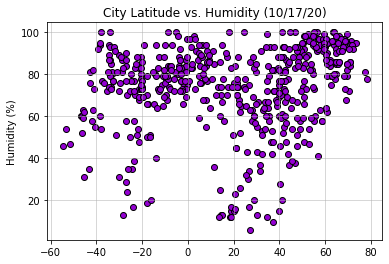

In [242]:
# Create Latitude vs. Humnidity Plot scatter plot
plt.scatter(city_clean_data["Lat"],city_clean_data["Humidity"], facecolor = "darkviolet", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Humidity (10/17/20)")

# Set xX.xlabel("Laitude")

# Y axis label
plt.ylabel("Humidity (%)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

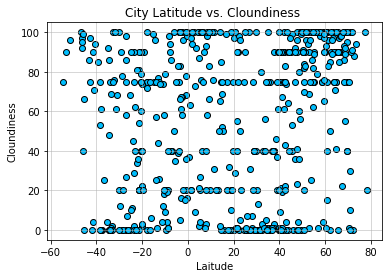

In [243]:
# Create Latitude vs. Cloundiness Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["Cloundiness"], facecolor = "deepskyblue", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Cloundiness ")

#X axis label
plt.xlabel("Laitude")

# Y axis label
plt.ylabel("Cloundiness")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

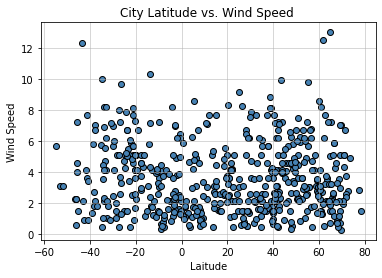

In [244]:
# Create Latitude vs. Wind Speed Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Wind Speed ")

#X axis label
plt.xlabel("Laitude")

# Y axis label
plt.ylabel("Wind Speed")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Humidity.png")

## Linear Regression

In [246]:
#Define North and south
north = city_clean_data.loc[city_weather_df['Lat'] >= 0]
south = city_clean_data.loc[city_weather_df['Lat'] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [257]:
# Perform a linear regression on temperature vs. latitude
x_values = north['MaxTemp']
y_values = north['Lat']
#city_clean_data.loc[:,("MaxTemp", 'Lat')]
# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress temp'] = regress_values

north

-1.3424701620591721 423.3633226802769 -0.8592746241052742


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress tXemp
0,Upernavik,72.79,-56.15,269.75,95,88,2.77,61.231996,61.231996
5,Basco,20.45,121.97,302.05,84,100,8.34,17.870210,17.870210
7,Ashcroft,50.72,-121.29,282.15,48,75,3.60,44.585366,44.585366
8,Yumen,40.28,97.20,274.76,70,0,2.65,54.506221,54.506221
9,Pevek,69.70,170.31,271.90,99,95,0.25,58.345686,58.345686
...,...,...,...,...,...,...,...,...,...
534,Greencastle,39.64,-86.86,289.82,82,90,0.81,34.288620,34.288620
536,Naze,28.37,129.48,299.15,88,75,5.10,21.763374,21.763374
537,Panjāb,34.39,67.02,270.90,77,0,2.32,59.688156,59.688156
538,Berezovyy,51.67,135.70,277.57,88,100,0.83,50.733880,50.733880


Text(40, 19, 'r^2 = 0.74')

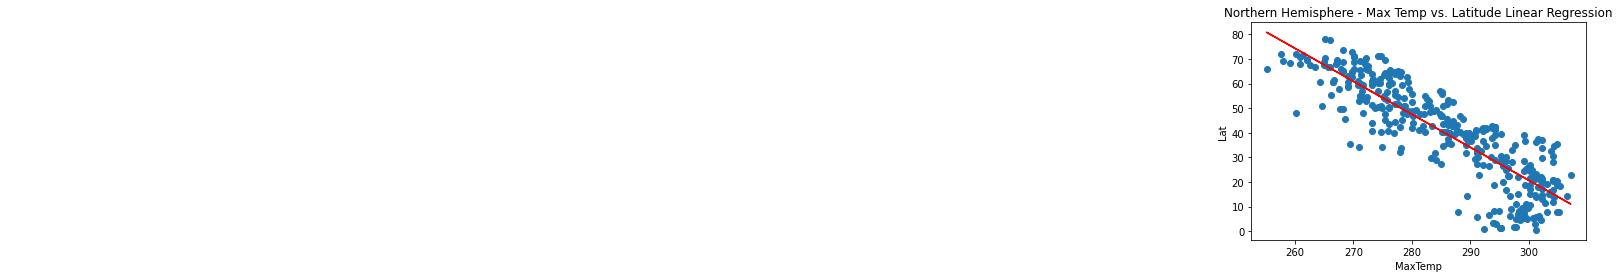

In [258]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('MaxTemp')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [259]:
# Perform a linear regression on temperature vs. latitude
#x_values = south['MaxTemp']
#y_values = south['Lat']
city_clean_data.loc[:, ('MaxTemp', 'Lat')]

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress temp'] = regress_values

south

-1.3424701620591721 423.3633226802769 -0.8592746241052742


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10,NaN
2,Avarua,-21.21,-159.78,298.15,83,54,5.10,NaN
3,Hermanus,-34.42,19.23,282.59,94,0,3.54,NaN
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43,NaN
6,Ushuaia,-54.80,-68.30,285.15,46,75,5.70,NaN
...,...,...,...,...,...,...,...,...
526,Santa Maria,-29.68,-53.81,294.30,76,12,6.01,NaN
528,Chala,-7.58,31.27,292.15,82,40,1.24,NaN
535,Itarema,-2.92,-39.92,299.69,80,61,7.03,NaN
540,Denpasar,-8.65,115.22,298.15,100,40,0.50,NaN


Text(40, 19, 'r^2 = 0.74')

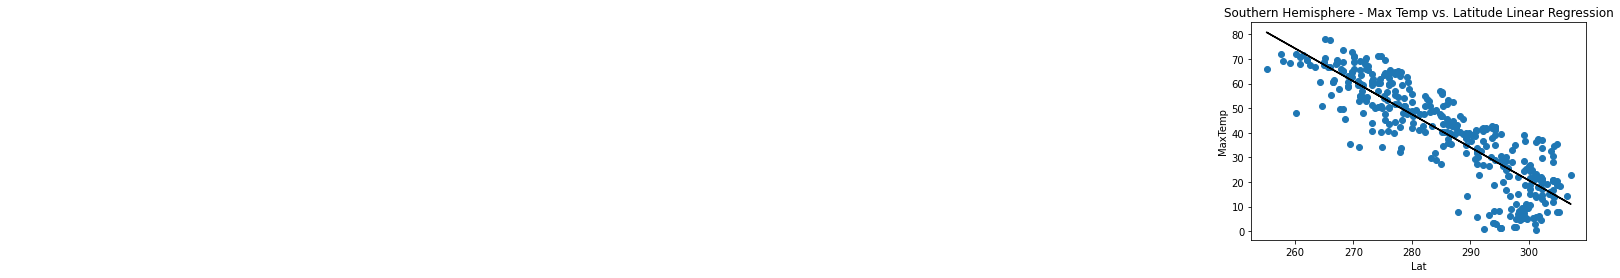

In [260]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='black')

plt.xlabel('Lat')
plt.ylabel('MaxTemp')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [222]:
# Perform a linear regression on temperature vs. latitude
x_values = north['Humidity']
y_values = north['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress hum'] = regress_values

north

0.2885940024906347 18.72199474011428 0.31014700007760565


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum
0,Upernavik,72.79,-56.15,269.75,95,88,2.77,61.231996,46.138425
5,Basco,20.45,121.97,302.05,84,100,8.34,17.870210,42.963891
7,Ashcroft,50.72,-121.29,282.15,48,75,3.60,44.585366,32.574507
8,Yumen,40.28,97.20,274.76,70,0,2.65,54.506221,38.923575
9,Pevek,69.70,170.31,271.90,99,95,0.25,58.345686,47.292801
...,...,...,...,...,...,...,...,...,...
534,Greencastle,39.64,-86.86,289.82,82,90,0.81,34.288620,42.386703
536,Naze,28.37,129.48,299.15,88,75,5.10,21.763374,44.118267
537,Panjāb,34.39,67.02,270.90,77,0,2.32,59.688156,40.943733
538,Berezovyy,51.67,135.70,277.57,88,100,0.83,50.733880,44.118267


Text(40, 19, 'r^2 = 0.02')

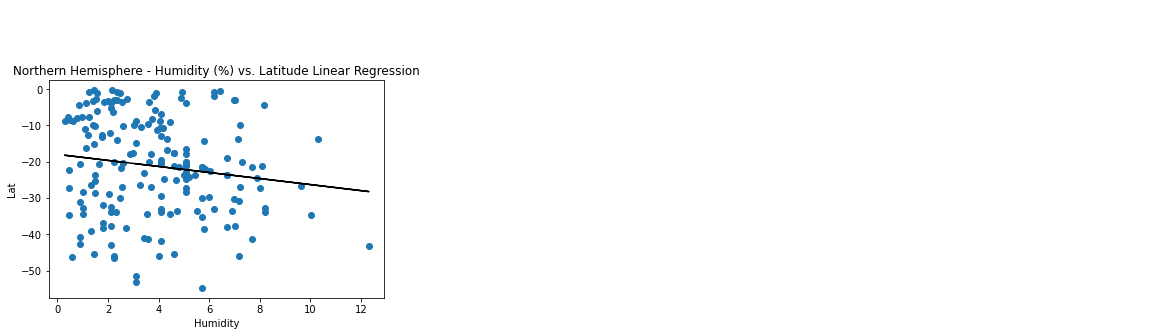

In [238]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='black')

plt.xlabel('Humidity')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='black')
plt.annotate(r_squared, (40, 19), color='black')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [214]:
# Perform a linear regression on temperature vs. latitude
x_values = south['Humidity']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress hum'] = regress_values

south

0.21243111232552322 -36.66263188714725 0.26732620940816043


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10,NaN,-25.191352
2,Avarua,-21.21,-159.78,298.15,83,54,5.10,NaN,-19.030850
3,Hermanus,-34.42,19.23,282.59,94,0,3.54,NaN,-16.694107
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43,NaN,-20.730298
6,Ushuaia,-54.80,-68.30,285.15,46,75,5.70,NaN,-26.890801
...,...,...,...,...,...,...,...,...,...
526,Santa Maria,-29.68,-53.81,294.30,76,12,6.01,NaN,-20.517867
528,Chala,-7.58,31.27,292.15,82,40,1.24,NaN,-19.243281
535,Itarema,-2.92,-39.92,299.69,80,61,7.03,NaN,-19.668143
540,Denpasar,-8.65,115.22,298.15,100,40,0.50,NaN,-15.419521


Text(40, 19, 'r^2 = 0.1')

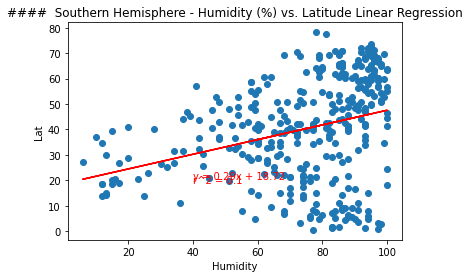

In [228]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Humidity')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [230]:
# Perform a linear regression on temperature vs. latitude
x_values = north['Cloundiness']
y_values = north['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress cloud'] = regress_values

north

0.13836161872746155 32.30278708376061 0.2703872308178128


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum,regress cloud
0,Upernavik,72.79,-56.15,269.75,95,88,2.77,61.231996,46.138425,44.478610
5,Basco,20.45,121.97,302.05,84,100,8.34,17.870210,42.963891,46.138949
7,Ashcroft,50.72,-121.29,282.15,48,75,3.60,44.585366,32.574507,42.679908
8,Yumen,40.28,97.20,274.76,70,0,2.65,54.506221,38.923575,32.302787
9,Pevek,69.70,170.31,271.90,99,95,0.25,58.345686,47.292801,45.447141
...,...,...,...,...,...,...,...,...,...,...
534,Greencastle,39.64,-86.86,289.82,82,90,0.81,34.288620,42.386703,44.755333
536,Naze,28.37,129.48,299.15,88,75,5.10,21.763374,44.118267,42.679908
537,Panjāb,34.39,67.02,270.90,77,0,2.32,59.688156,40.943733,32.302787
538,Berezovyy,51.67,135.70,277.57,88,100,0.83,50.733880,44.118267,46.138949


Text(40, 19, 'r^2 = 0.07')

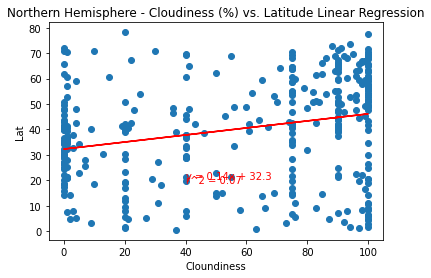

In [231]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Cloundiness')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [221]:
x_values = south['Cloundiness']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress scloud'] = regress_values

south

0.010964308612268887 -21.73206626288496 0.029322707200704977


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum,regress cloud,regress wind,regress scloud
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10,NaN,-25.191352,-20.745278,-20.574565,-20.745278
2,Avarua,-21.21,-159.78,298.15,83,54,5.10,NaN,-19.030850,-21.139994,-22.239194,-21.139994
3,Hermanus,-34.42,19.23,282.59,94,0,3.54,NaN,-16.694107,-21.732066,-20.940784,-21.732066
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43,NaN,-20.730298,-21.556637,-23.346171,-21.556637
6,Ushuaia,-54.80,-68.30,285.15,46,75,5.70,NaN,-26.890801,-20.909743,-22.738582,-20.909743
...,...,...,...,...,...,...,...,...,...,...,...,...
526,Santa Maria,-29.68,-53.81,294.30,76,12,6.01,NaN,-20.517867,-21.600495,-22.996599,-21.600495
528,Chala,-7.58,31.27,292.15,82,40,1.24,NaN,-19.243281,-21.293494,-19.026461,-21.293494
535,Itarema,-2.92,-39.92,299.69,80,61,7.03,NaN,-19.668143,-21.063243,-23.845560,-21.063243
540,Denpasar,-8.65,115.22,298.15,100,40,0.50,NaN,-15.419521,-21.293494,-18.410549,-21.293494


Text(40, 19, 'r^2 = 0.07')

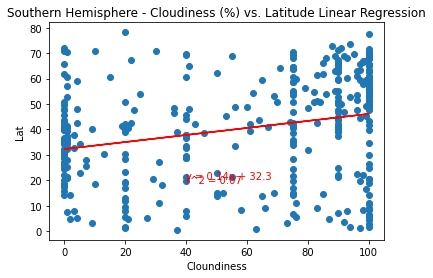

In [232]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Cloundiness')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [233]:
# Perform a linear regression on temperature vs. latitude
x_values = south['Wind Speed']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress wind'] = regress_values

south

-0.8323140235417384 -17.99439198596774 -0.1424267459105969


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum,regress cloud,regress wind,regress scloud
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10,NaN,-25.191352,-20.745278,-20.574565,-20.745278
2,Avarua,-21.21,-159.78,298.15,83,54,5.10,NaN,-19.030850,-21.139994,-22.239194,-21.139994
3,Hermanus,-34.42,19.23,282.59,94,0,3.54,NaN,-16.694107,-21.732066,-20.940784,-21.732066
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43,NaN,-20.730298,-21.556637,-23.346171,-21.556637
6,Ushuaia,-54.80,-68.30,285.15,46,75,5.70,NaN,-26.890801,-20.909743,-22.738582,-20.909743
...,...,...,...,...,...,...,...,...,...,...,...,...
526,Santa Maria,-29.68,-53.81,294.30,76,12,6.01,NaN,-20.517867,-21.600495,-22.996599,-21.600495
528,Chala,-7.58,31.27,292.15,82,40,1.24,NaN,-19.243281,-21.293494,-19.026461,-21.293494
535,Itarema,-2.92,-39.92,299.69,80,61,7.03,NaN,-19.668143,-21.063243,-23.845560,-21.063243
540,Denpasar,-8.65,115.22,298.15,100,40,0.50,NaN,-15.419521,-21.293494,-18.410549,-21.293494


Text(40, 19, 'r^2 = 0.02')

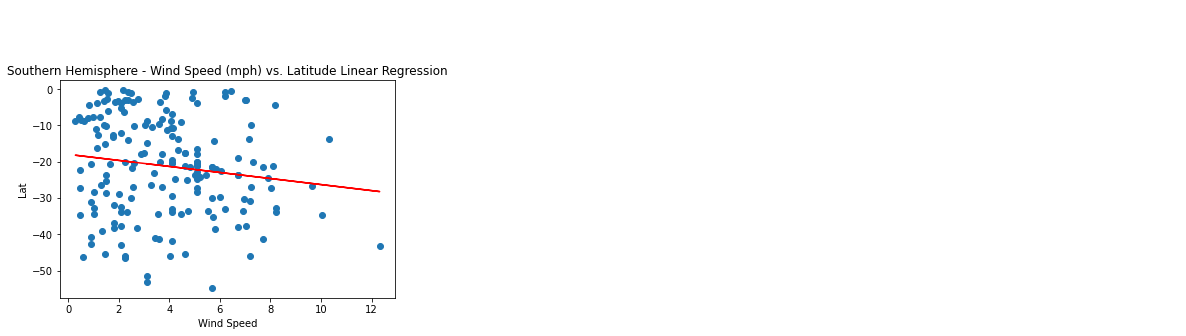

In [235]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')